In [1]:
%load_ext autoreload
%autoreload 2

from synthetic_dataset_1 import make_ds1, ppf_ystar_ds1, epsilon_ds1
from synthetic_dataset_2 import make_ds2, ppf_ystar_ds2, epsilon_ds2
from synthetic_dataset_3 import make_ds3, ppf_ystar_ds3, epsilon_ds3

from scipy import stats
from matplotlib.ticker import MultipleLocator
import numpy as np
from matplotlib import pyplot as plt
import matplotlib

# Plot the datasets themselves

In [4]:
# Varaince for 2nd noise distribution.
((0.25 ** 2) + (0.75 ** 2)) ** 0.5

0.7905694150420949

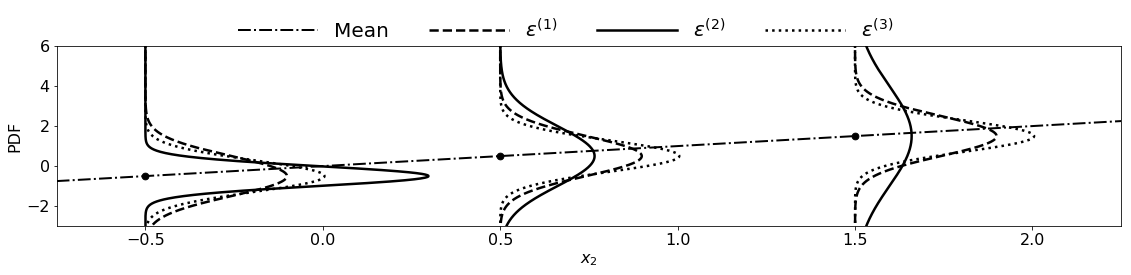

In [6]:
def plot_datasets():
    def x():
        return np.arange(-10, 10, 0.01)
        
    def plot_ds1(ax, x2, show_label):
        ax.plot(x2 + stats.norm.pdf(x(), loc=x2, scale=1), 
                x(), 
                label='$\\varepsilon^{(1)}$' if show_label else None,
                linewidth=2.5,
                color='black', 
                linestyle='--', 
                alpha=1.0)
    
    def plot_ds2(ax, x2, show_label):
        ax.plot(x2 + stats.norm.pdf(x(), loc=x2, scale=abs(1 + x2)), 
                x(), 
                label='$\\varepsilon^{(2)}$' if show_label else None,
                linewidth=2.5,
                color='black', 
                linestyle='-', 
                alpha=1.0)
    
    def plot_ds3(ax, x2, show_label):
        ax.plot(x2 + stats.norm.pdf(x(), loc=x2, scale=((0.25 ** 2) + (0.75 ** 2)) ** 0.5), 
                x(), 
                label='$\\varepsilon^{(3)}$' if show_label else None,
                linewidth=2.5,
                color='black', 
                linestyle=':', 
                alpha=1.0)
    
    def plot_all(ax, x2, show_label):
        ax.scatter(x2, x2, color='black', s=45, marker='o')
        plot_ds1(ax=ax, x2=x2, show_label=show_label)
        plot_ds2(ax=ax, x2=x2, show_label=show_label)
        plot_ds3(ax=ax, x2=x2, show_label=show_label)
    
    plt.rcParams.update({'font.size': 16})
    fig, ax = plt.subplots(figsize=(16, 4))
    ax.plot(x(), x(), color='black', linestyle='-.', alpha=1.0, linewidth=2, label='Mean')
    plot_all(ax=ax, x2=-0.5, show_label=True)
    plot_all(ax=ax, x2=0.5, show_label=False)
    plot_all(ax=ax, x2=1.5, show_label=False)
    ax.set_xlim(-0.75, 2.25)
    ax.set_ylim(-3, 6)
    ax.set_xlabel('$x_2$')
    ax.set_ylabel('PDF')
    fig.legend(*ax.get_legend_handles_labels(), 
               fontsize=20,
               frameon=False,
               loc='upper center', 
               ncol=4, 
               handlelength=4)
    plt.tight_layout()
    plt.subplots_adjust(top=0.83)
    return fig

plot_datasets().savefig('synthds.png', dpi=100)

In [4]:
def plot_one_ds(ax, x1, x2_range):
    ax.plot(x2_range,
            linestyle='--' if x1 == -1 else '-', 
            color='black', 
            alpha=0.9, 
            linewidth=2, 
            label='$x_1 = %d$' % x1)

# Plot quantiles of the datasets

In [5]:
def plot_one(ax, theta, x1, x2_range, ppf):
    q = ppf(
        theta=theta, 
        ds={'x0': np.ones(x2_range.shape), 
            'x1': x1 * np.ones(x2_range.shape), 
            'x2': x2_range}
    )
    ax.plot(x2_range, 
            q, 
            linestyle='--' if x1 == -1 else '-', 
            color='black', 
            alpha=0.9, 
            linewidth=2, 
            label='$x_1 = %d$' % x1)

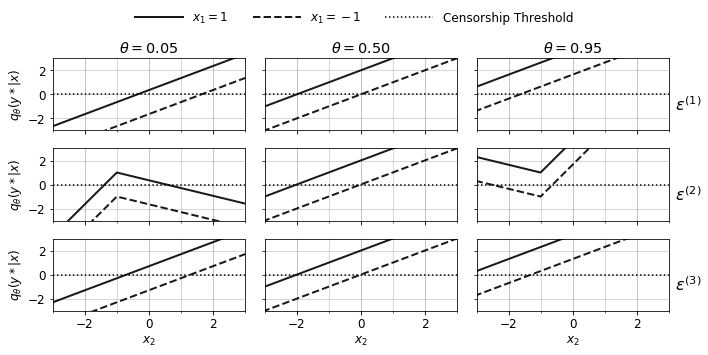

In [6]:
def plot_all():
    plt.rcParams.update({'font.size': 12})
    fig, axes = plt.subplots(3, 3, figsize=(10, 5), sharex=True, sharey=True)
    for i, (ds_name, ppf) in enumerate(sorted(
            {'ds1': ppf_ystar_ds1, 
             'ds2': ppf_ystar_ds2, 
             'ds3': ppf_ystar_ds3}.items())):
        for j, theta in enumerate([0.05, 0.50, 0.95]):
            ax = axes.flatten()[3 * i + j]
            ax.xaxis.set_minor_locator(MultipleLocator(1))
            ax.set_xlim(-3, 3)
            ax.set_ylim(-3, 3)
            ax.grid(which='both', linewidth=0.5)
            for x1 in [1, -1]:
                plot_one(ax=ax, 
                         theta=theta, 
                         x1=x1, 
                         x2_range=np.arange(-4, 4, 0.01), 
                         ppf=ppf)
            ax.axhline(0, color='black', linewidth=1.5, linestyle=':', label='Censorship Threshold')                
    axes.flatten()[0].set_ylabel('$q_\\theta(y* | x)$')
    axes.flatten()[3].set_ylabel('$q_\\theta(y* | x)$')
    axes.flatten()[6].set_ylabel('$q_\\theta(y* | x)$')
    axes.flatten()[0].set_title('$\\theta = 0.05$')
    axes.flatten()[1].set_title('$\\theta = 0.50$')
    axes.flatten()[2].set_title('$\\theta = 0.95$')
    axes.flatten()[6].set_xlabel('$x_2$')
    axes.flatten()[7].set_xlabel('$x_2$')
    axes.flatten()[8].set_xlabel('$x_2$')
    axes.flatten()[2].yaxis.set_label_position('right')
    axes.flatten()[2].set_ylabel('$\\qquad\\varepsilon^{(1)}$', rotation=0, fontsize=16)
    axes.flatten()[5].yaxis.set_label_position('right')
    axes.flatten()[5].set_ylabel('$\\qquad\\varepsilon^{(2)}$', rotation=0, fontsize=16)
    axes.flatten()[8].yaxis.set_label_position('right')
    axes.flatten()[8].set_ylabel('$\\qquad\\varepsilon^{(3)}$', rotation=0, fontsize=16)
    fig.legend(*axes.flatten()[0].get_legend_handles_labels(), 
               frameon=False,
               loc='upper center', ncol=3, handlelength=4)
    plt.tight_layout()
    plt.subplots_adjust(top=0.84)
    return fig
    
plot_all().savefig('qsynth.png', dpi=100)